In [1]:
import numpy as np
import pandas as pd
import overpy
import geopandas as gpd
from shapely.geometry import Polygon, box, Point
import os
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from shapely import wkt
import seaborn as sns
import folium
import branca
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from src import utils_plot as utils
import warnings

warnings.filterwarnings("ignore")

## Read Data

In [2]:
import os

os.getcwd()

'/Users/yj/Documents/Duke MIDS/0_Capstone/00_github/wastewater_treatment/restructure'

In [3]:
ca_yes_maybe = utils.osm2gdf(osm_path="../interactive_map/gdf_CA_yes_and_maybe.csv")
tx_yes_maybe = utils.osm2gdf(osm_path="../interactive_map/gdf_TX_yes_and_maybe.csv")
gdf_client = utils.read_client_data(
    client_data_path="../00_source_data/CA_VerifiedSolar_VerifiedLocation.xlsx"
)

## Interactive Map

In [4]:
# interactive map for CA
map_CA = utils.interactive_map(ca_yes_maybe)

# interactive map for TX
map_TX = utils.interactive_map(tx_yes_maybe)

In [5]:
map_CA

In [6]:
map_TX

## California Analysis

In [7]:
ca_state_boudary, ca_counties_boundary = utils.state_county_boundary("California")

### Compare to Client Provided Dataset

In [8]:
gdf_client_with_closest_point = utils.find_closest_point(
    source_df=gdf_client,
    target_df=ca_yes_maybe,
    source_lat_col="lat",
    source_lon_col="lon",
    target_lat_col="osm_latitude",
    target_lon_col="osm_longitude",
)

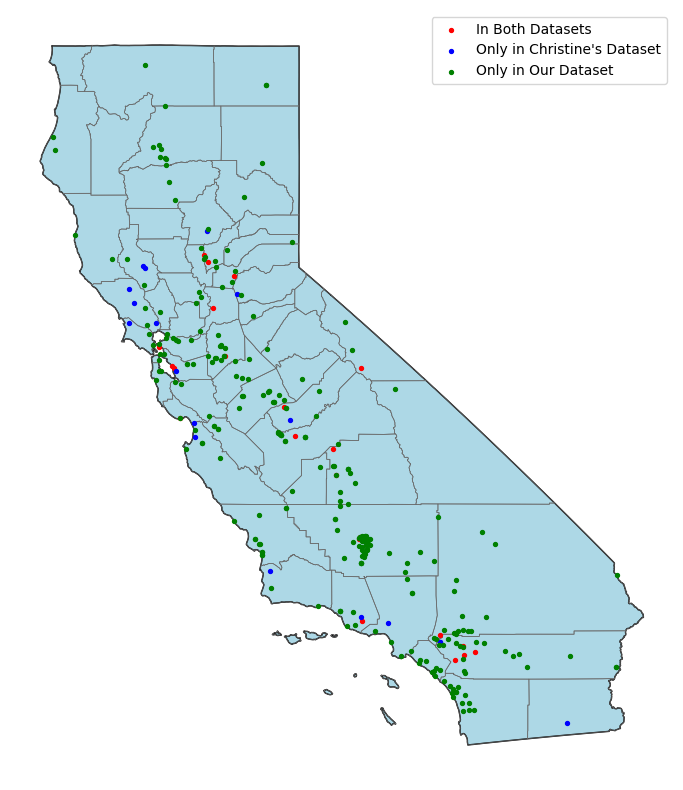

In [9]:
# plot the map in 3 different categories
gdf_client_with_closest_point.loc[
    :, "closest_WWTP_name"
] = gdf_client_with_closest_point["osm_longitude"].apply(
    lambda x: ca_yes_maybe.loc[ca_yes_maybe["osm_longitude"] == x, "WWTP_name"].values[
        0
    ]
)
gdf_same = gdf_client_with_closest_point.loc[
    gdf_client_with_closest_point["distance"] < 1
]
gdf_only_christine = gdf_client_with_closest_point.loc[
    gdf_client_with_closest_point["distance"] >= 1
]
gdf_only_us = ca_yes_maybe.loc[
    ~ca_yes_maybe["WWTP_name"].isin(gdf_same["closest_WWTP_name"])
]

fig, ax = plt.subplots(figsize=(10, 10))
ca_state_boudary.plot(ax=ax, color="lightblue", edgecolor="black")
ca_counties_boundary.plot(ax=ax, facecolor="none", edgecolor="dimgrey", linewidth=0.5)
gdf_same.plot(ax=ax, marker="o", color="red", markersize=8, label="In Both Datasets")
gdf_only_christine.plot(
    ax=ax, marker="o", color="blue", markersize=8, label="Only in Christine's Dataset"
)
gdf_only_us.plot(
    ax=ax, marker="o", color="green", markersize=8, label="Only in Our Dataset"
)
ax.legend()

# Set title
plt.axis("off")
plt.legend()
plt.show()

### Population and Income Map

In [10]:
ca_merged_income_pop = utils.merge_income_pop_boundary(
    state_boundary_path="../00_source_data/CA_2016_06_place",
    income_path="../00_source_data/CA_income.csv",
    pop_path="../00_source_data/CA_pop.csv",
    state_name="California",
)

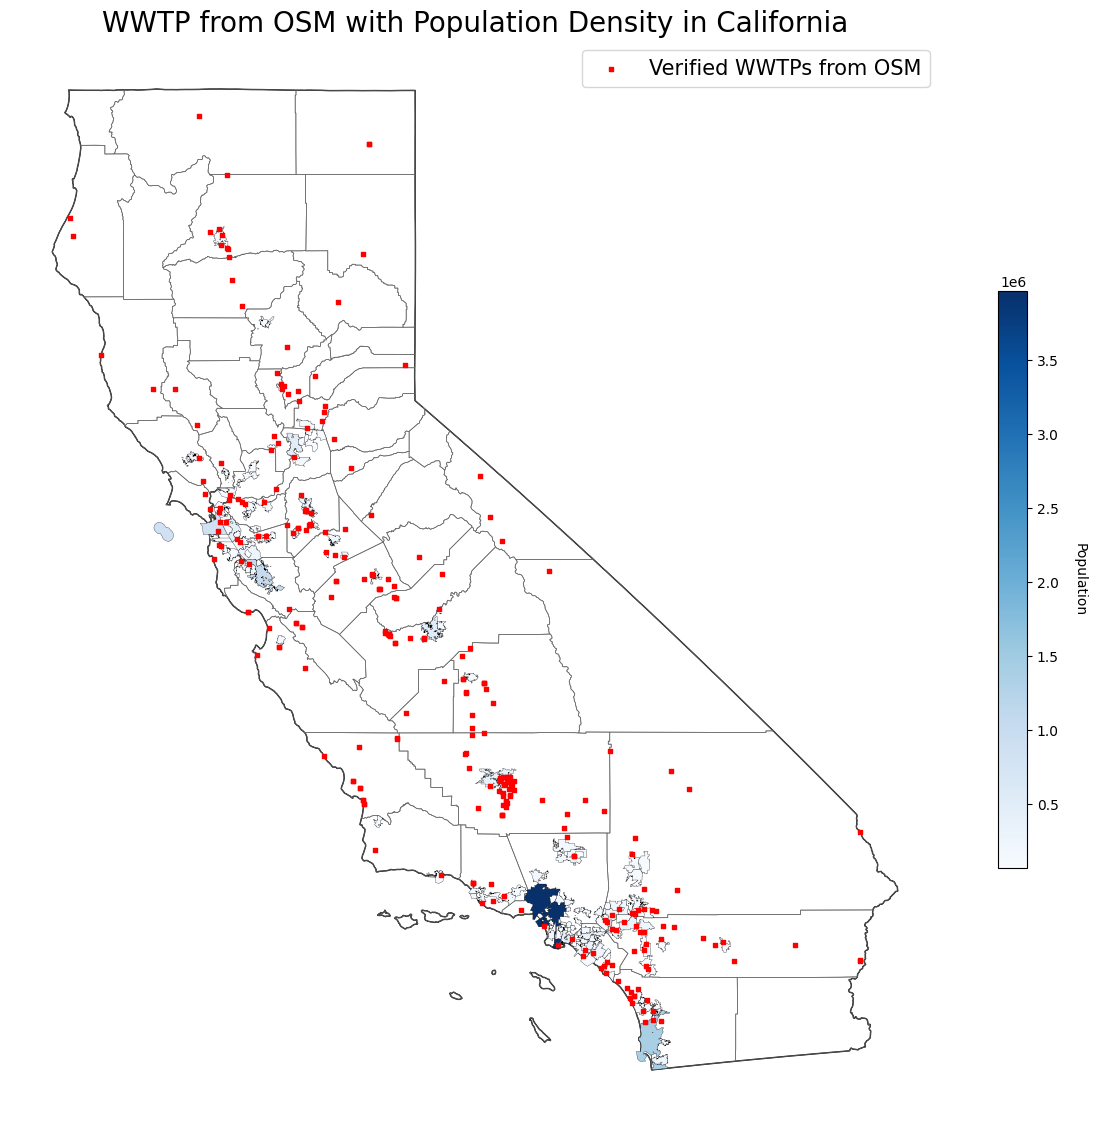

In [11]:
utils.plt_state_socioeconomic_map(
    merged_gdf=ca_merged_income_pop,
    wwtp_gdf=ca_yes_maybe,
    state_boudary=ca_state_boudary,
    counties_boundary=ca_counties_boundary,
    title="WWTP from OSM with Population Density in California",
    column="population",
    cmap="Blues",
)

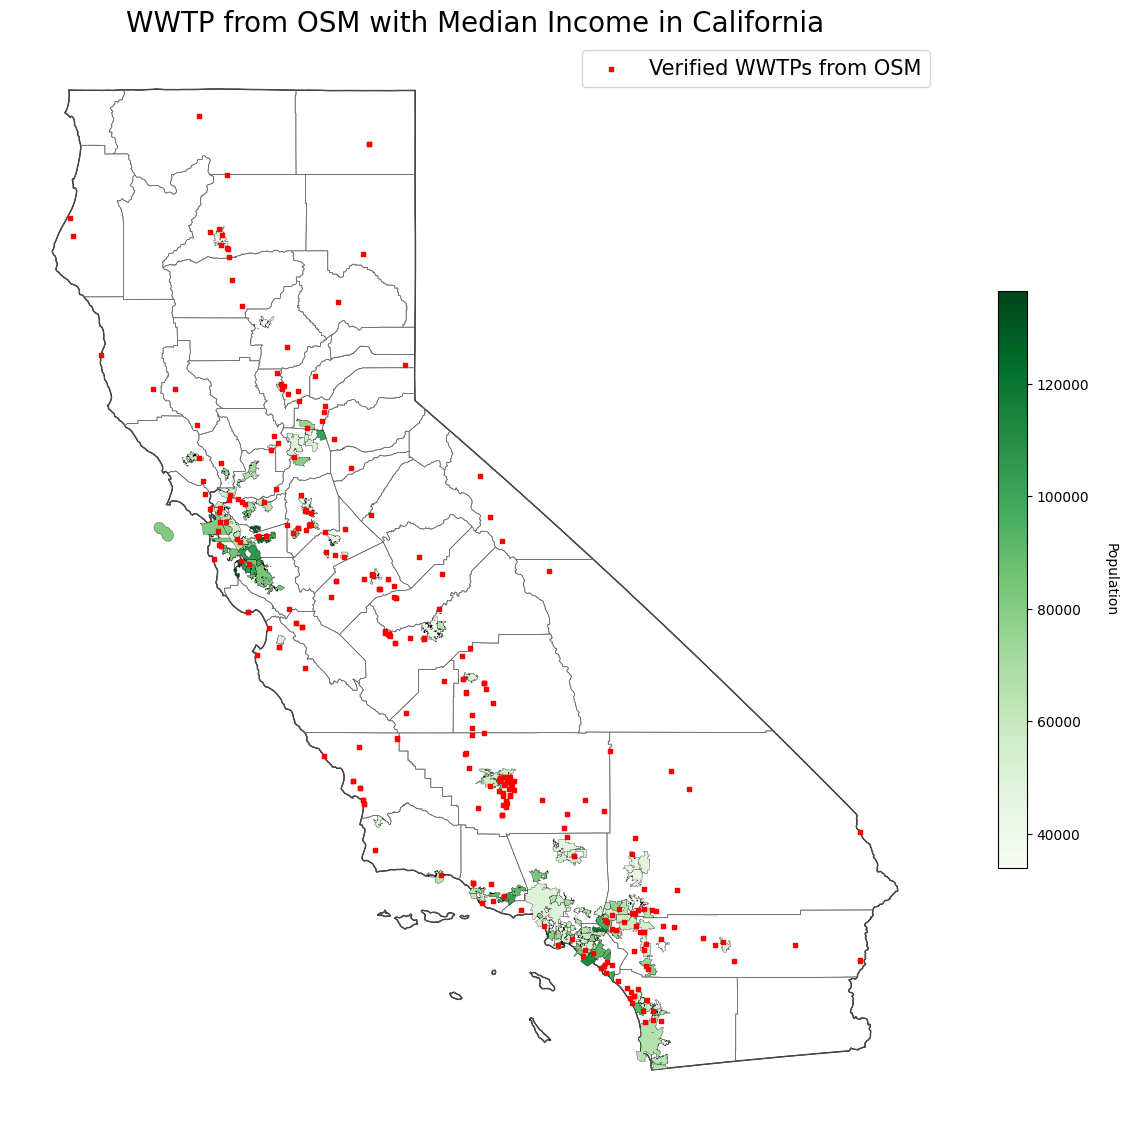

In [12]:
utils.plt_state_socioeconomic_map(
    merged_gdf=ca_merged_income_pop,
    wwtp_gdf=ca_yes_maybe,
    state_boudary=ca_state_boudary,
    counties_boundary=ca_counties_boundary,
    title="WWTP from OSM with Median Income in California",
    column="income",
    cmap="Greens",
)

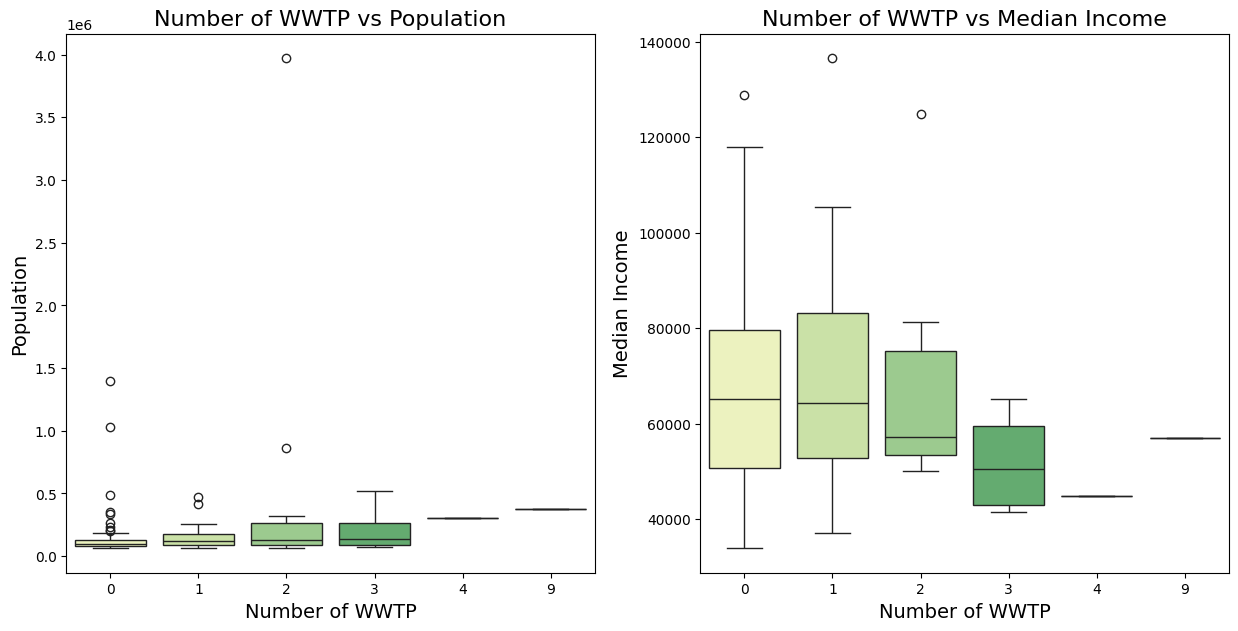

In [13]:
utils.pop_income_boxplot(ca_merged_income_pop, ca_yes_maybe)

## Texas Analysis

In [14]:
tx_state_boudary, tx_counties_boundary = utils.state_county_boundary("Texas")

### Population and Income Map

In [15]:
tx_merged_income_pop = utils.merge_income_pop_boundary(
    state_boundary_path="../00_source_data/TX_MCD",
    income_path="../00_source_data/TX_income.csv",
    pop_path="../00_source_data/TX_pop.csv",
    state_name="Texas",
)

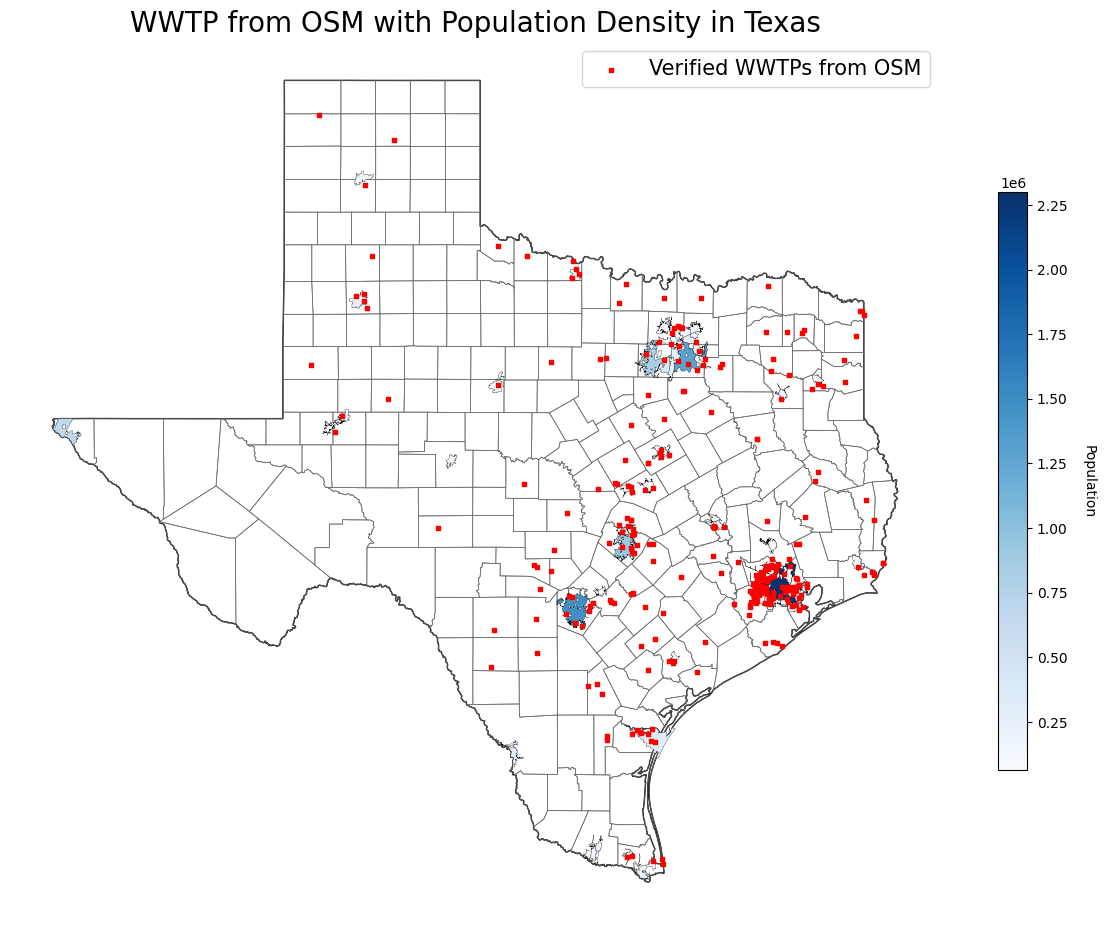

In [18]:
utils.plt_state_socioeconomic_map(
    merged_gdf=tx_merged_income_pop,
    wwtp_gdf=tx_yes_maybe,
    state_boudary=tx_state_boudary,
    counties_boundary=tx_counties_boundary,
    title="WWTP from OSM with Population Density in Texas",
    column="population",
    cmap="Blues",
)

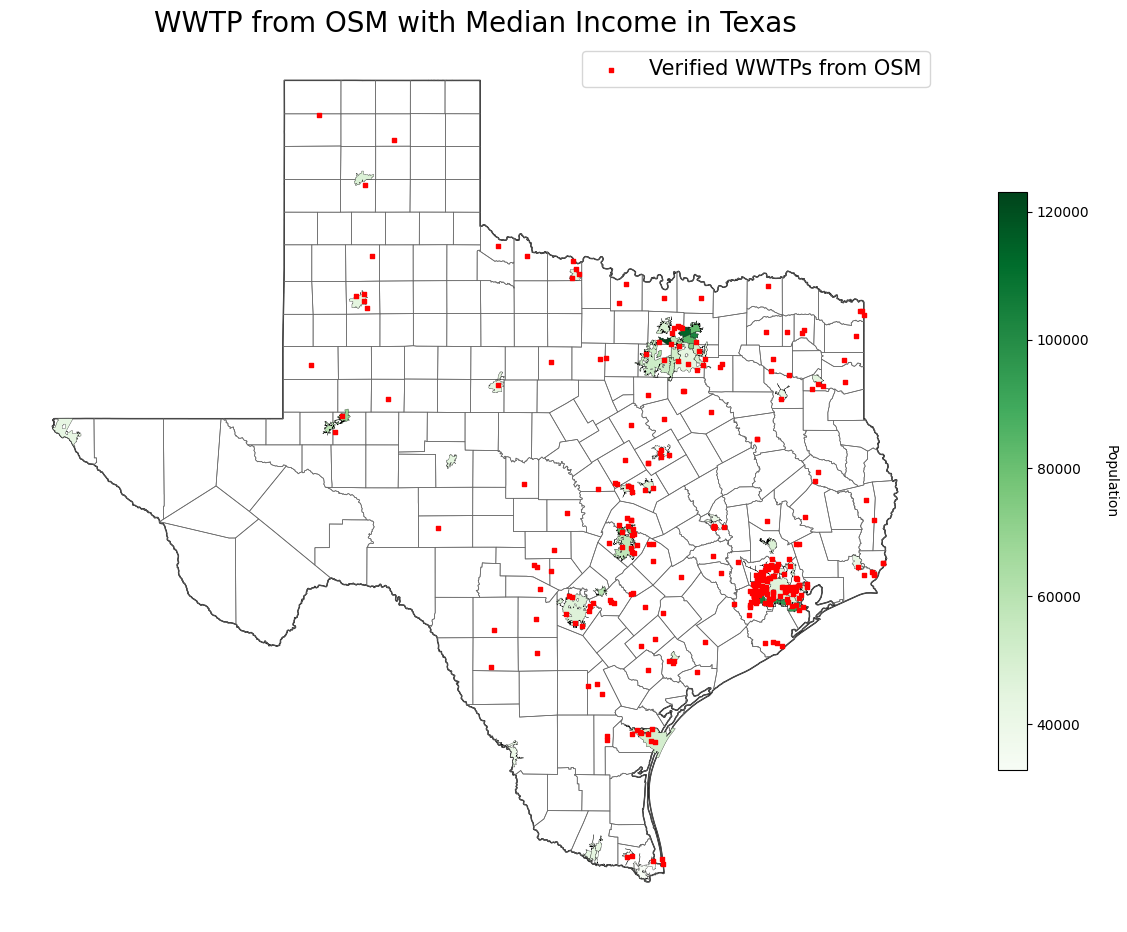

In [20]:
utils.plt_state_socioeconomic_map(
    merged_gdf=tx_merged_income_pop,
    wwtp_gdf=tx_yes_maybe,
    state_boudary=tx_state_boudary,
    counties_boundary=tx_counties_boundary,
    title="WWTP from OSM with Median Income in Texas",
    column="income",
    cmap="Greens",
)

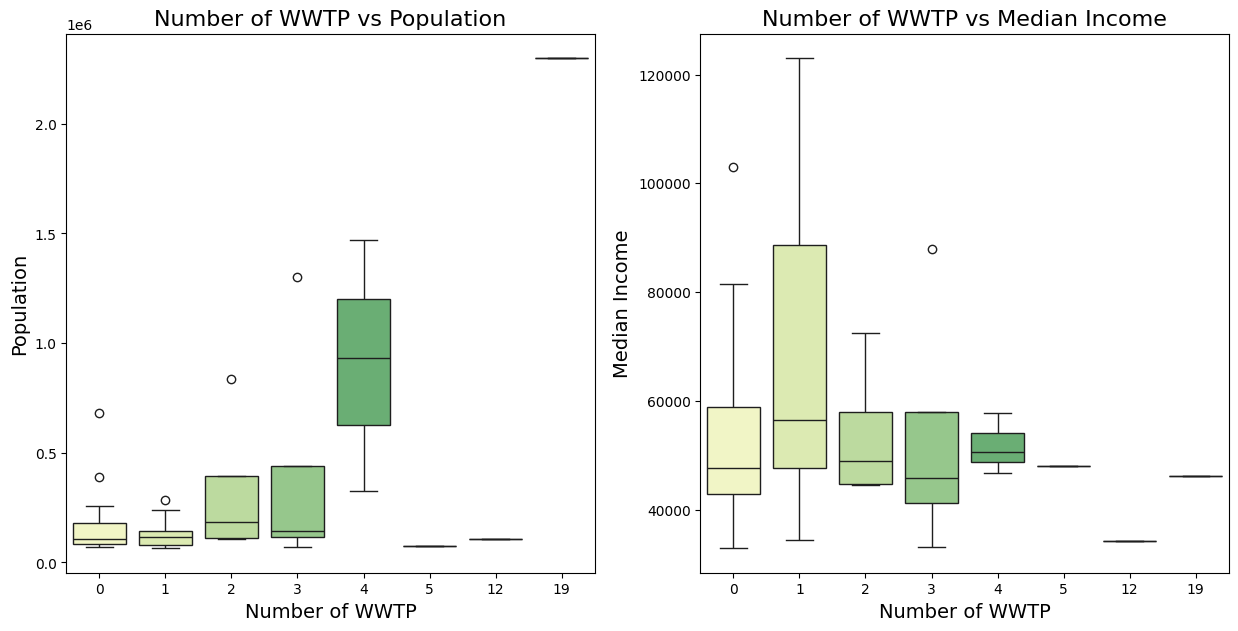

In [21]:
utils.pop_income_boxplot(tx_merged_income_pop, tx_yes_maybe)